In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import cov
import csv
import glob
from scipy.stats import pearsonr,spearmanr

## 1. Обработка данных

In [ ]:
# specifying the path to csv files

In [69]:
path = "DATA/"

In [70]:
# xlsx files in the path

In [71]:
file_list = glob.glob(path + "/*.xlsx")

In [90]:
print(file_list)

['DATA\\Daily Report 2-1-2021.XLSX', 'DATA\\Daily Report 2-2-2021.XLSX']


In [91]:
# list of excel files we want to merge.
# pd.read_excel(file_path) reads the excel
# data into pandas dataframe.

In [92]:
excl_list = []

In [176]:
i=0
for file in file_list:
    df=pd.read_excel(file, sheet_name='Daily', usecols="A:R", skiprows=1,nrows=5760, header = None)
    df.to_excel('DATA_CHANGED/' + str(i)+'.xlsx',header=True, index = False)
    i=i+1
    print(i)

1
2


In [177]:
path1 = "DATA_CHANGED/"
file_list1 = glob.glob(path1 + "/*.xlsx")
print(file_list1)

['DATA_CHANGED\\0.xlsx', 'DATA_CHANGED\\1.xlsx']


In [189]:
excl_list = []
for file in file_list1:
    excl_list.append(pd.read_excel(file))

In [199]:
print(excl_list

TypeError: 'list' object is not callable

In [191]:
excl_merged = pd.concat(excl_list, axis=0, ignore_index=False)

In [192]:
print(excl_merged)

             0         1   2          3   4     5          6           7   \
0    2021-02-01  00:00:00  69  78.531898   1  1711  11.932508   86.082176   
1    2021-02-01  00:00:15  72  87.131073   1  1786  12.011719   38.682724   
2    2021-02-01  00:00:30  72  87.131073   1  1786  12.011719   38.682724   
3    2021-02-01  00:00:45  70  79.038269   1  1740  11.949870  363.299347   
4    2021-02-01  00:01:00  71  86.344398   1  1765  12.011719   25.426794   
...         ...       ...  ..        ...  ..   ...        ...         ...   
5755 2021-02-02  23:58:45  69  61.405891   1  1724  12.011719  427.426941   
5756 2021-02-02  23:59:00  69  62.644676   1  1724  12.011719  428.023712   
5757 2021-02-02  23:59:15  69  61.523438   1  1724  12.011719  427.408844   
5758 2021-02-02  23:59:30  69  62.337238   1  1724  11.934679  427.246094   
5759 2021-02-02  23:59:45  69  62.698929   1  1724  12.011719  427.246094   

            8          9          10        11     12     13         14  \


In [193]:
excl_merged.to_excel('DATA_EXPORT/Total.xlsx', index = False)

In [195]:
excl_merged.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2021-02-01,00:00:00,69,78.531898,1,1711,11.932508,86.082176,1.867694,76.106628,82.533424,9.548612,51010,100.0,91.634109,100.025322,92.494934,52.535667
1,2021-02-01,00:00:15,72,87.131073,1,1786,12.011719,38.682724,3.063368,76.118706,82.527382,7.646484,51010,100.0,91.116898,100.047012,92.715569,52.535667
2,2021-02-01,00:00:30,72,87.131073,1,1786,12.011719,38.682724,3.063368,76.118706,82.527382,7.646484,51010,100.0,91.116898,100.047012,92.715569,52.535667
3,2021-02-01,00:00:45,70,79.038269,1,1740,11.949870,363.299347,2.782335,76.118706,82.551537,7.327474,51010,100.0,90.917969,100.025322,92.661316,52.535667


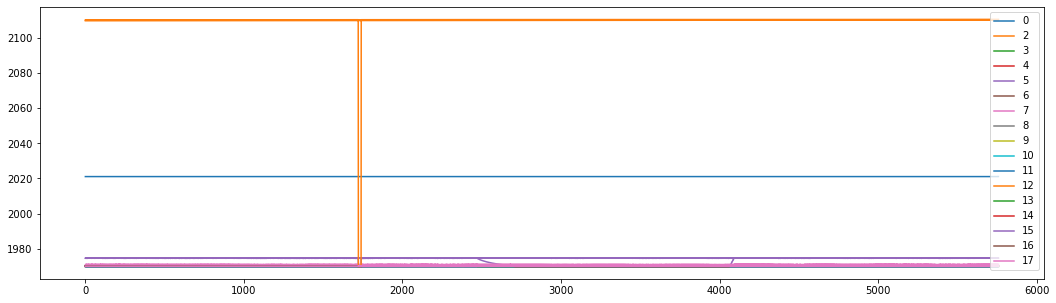

In [196]:
excl_merged.plot(figsize=(18, 5));

## Расчет корреляции двух рядов данных

In [2]:
#Расчет корреляции двух рядов данных
Indicators = {'System type': ['SS','PS','CL','IP','IR','DR'], 'R, bit/s': [133.405, 162.922,786.134,1146.229,444.442,1740.166],
        'MTBF (year)': [37,441,438,448,51,27917],
                }
df = pd.DataFrame(Indicators, columns = ['System type', 'R, bit/s','MTBF (year)'])

print (df)

  System type  R, bit/s  MTBF (year)
0          SS   133.405           37
1          PS   162.922          441
2          CL   786.134          438
3          IP  1146.229          448
4          IR   444.442           51
5          DR  1740.166        27917


In [3]:
R=df.iloc[:,1],
MTBF=df.iloc[:,2]
print (MTBF)

0       37
1      441
2      438
3      448
4       51
5    27917
Name: MTBF (year), dtype: int64


In [6]:
# calculate Pearson's correlation
covariance = cov(R, MTBF)
corr, _ = pearsonr(df.iloc[:,1], df.iloc[:,2])
corr1, _ = spearmanr(df.iloc[:,1], df.iloc[:,2])
print(covariance, 'Pearsons correlation: %.3f' % corr, 'Spearmans correlation: %.3f' % corr1)

[[3.91138917e+05 5.59247196e+06]
 [5.59247196e+06 1.27311103e+08]] Pearsons correlation: 0.793 Spearmans correlation: 0.829
